# Biodiversity in National Parks
Jonathan Bitner | Started 3/11/2024\
Codecademy portfolio project\
My goal is to showcase my thought process when looking at the data and explain each decision I make.\
For questions or comments, email at jsbitner94@gmail.com

### Project description from Codecademy:
For this project, you will interpret data from the National Parks Service about endangered species in different parks.\
You will perform some data analysis on the conservation statuses of these species and investigate if there are any patterns or themes to the types of species that become endangered.\
During this project, you will analyze, clean up, and plot data as well as pose questions and seek to answer them in 
a meaningful way.\
After you perform your analysis, you will share your findings about the National Park Service.

## I. Outline:
* Review data in `observations.csv` and `species_info.csv`
* Determine project goals
* Explore and explain data; consider analytical steps required
* Format for presentation

## II. Review the data
Main goal is to get a broad understanding of what is in the datasets

### Import files

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, chi2_contingency

observations_csv = pd.read_csv(r'C:\Users\jsbit\OneDrive\Documents\Coding 2023\Git\national-parks-biodiversity\observations.csv', encoding_errors='replace')
species_info_csv = pd.read_csv(r'C:\Users\jsbit\OneDrive\Documents\Coding 2023\Git\national-parks-biodiversity\species_info.csv', encoding_errors='replace')

### Basic descriptive statistics
#### Descriptives for `observations_csv`

In [2]:
print('First five rows:\n', observations_csv.head())
print('\nColumn names:\n', observations_csv.columns, '\n\nInfo:')
print(observations_csv.info())
print('\nDescription:\n', observations_csv.describe(include='all'))

First five rows:
             scientific_name                            park_name  observations
0        Vicia benghalensis  Great Smoky Mountains National Park            68
1            Neovison vison  Great Smoky Mountains National Park            77
2         Prunus subcordata               Yosemite National Park           138
3      Abutilon theophrasti                  Bryce National Park            84
4  Githopsis specularioides  Great Smoky Mountains National Park            85

Column names:
 Index(['scientific_name', 'park_name', 'observations'], dtype='object') 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23296 entries, 0 to 23295
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   scientific_name  23296 non-null  object
 1   park_name        23296 non-null  object
 2   observations     23296 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 546.1+ KB
None

Description:
        

#### Initial observations
* Curious if all `park_name` values end in `National Park`
* Column names are approptiately named and formatted (lowercase, underscore_for_space, no whitespace)
* No missing data on initial inspection
* Data types are appropriate
* Surprised to see the large amount of data for only four national parks
    * Potential to change `park_name` to Categorical

#### Descriptives for `species_info_csv`

In [3]:
print('First five rows:\n', species_info_csv.head())
print('\nColumn names:\n', species_info_csv.columns, '\n\nInfo:')
print(species_info_csv.info())
print('\nDescription:\n', species_info_csv.describe(include='all'))

First five rows:
   category                scientific_name  \
0   Mammal  Clethrionomys gapperi gapperi   
1   Mammal                      Bos bison   
2   Mammal                     Bos taurus   
3   Mammal                     Ovis aries   
4   Mammal                 Cervus elaphus   

                                        common_names conservation_status  
0                           Gapper's Red-Backed Vole                 NaN  
1                              American Bison, Bison                 NaN  
2  Aurochs, Aurochs, Domestic Cattle (Feral), Dom...                 NaN  
3  Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)                 NaN  
4                                      Wapiti Or Elk                 NaN  

Column names:
 Index(['category', 'scientific_name', 'common_names', 'conservation_status'], dtype='object') 

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5824 entries, 0 to 5823
Data columns (total 4 columns):
 #   Column               Non-Null Co

#### Initial observations
* I had the impression I would be working with trees; good to know that this must contain all life in the national parks.
* Could encounter difficulties with length of `common_names` due to multiple entries in a single observation
* Columns are appropriately named and formatted
* Data types are approptiate
    * Potential to change `category` to Categorical, since there are only seven unique values
    * Same for `conservation_status`; four unique values
* Only `conservation_status` is missing values
    * Are values only included for endangered species?
    * It seems worth exploring endangered species further
* I am surprised to see that the `count` and `unique` values are not the same for `scientific_name` and `common_names`
    * Indicates that there are duplicates of some kind here
    * Could a species be listed as `endangered` in one region, but not another, resulting in separate rows? Unlikely, since this dataset is not connected to `observations_csv` and has no park or region-related information.
    * Could there be multiple choices for `common_names`? Unlikely, since there can be multiple names in `common_names`

### Description of file variables

#### `observations_csv`
* `scientific_name`
    * Latin name for given species. May be further split into subcategories. Each species is listed four times in total; one data point for each park.
    * Categorical data
* `park_name`
    * The name of the national park the information was collected from. 
    * Observations collected from four parks: Bryce, Great Smoky Mountains, Yosemite, and Yellowstone National Parks.
    * Categorical data
* `observations`
    * Total count of a species within the park.
    * Discrete quantitiative data
    * Ranges from 9 to 321
    
#### `species_info_csv`
* `category`
    * A general classification of the species.
    * There are seven categories that represent the plant and animal kingdoms: Vascular plant, Nonvascular plant, Bird, Fish, Mammal, Amphibian, and Reptile.
    * Categorical data
* `scientific_name`
    * Latin name for given species. May be further split into subcategories. Each species is listed four times in total; one data point for each park. Duplicates may exist due to multiple unique values for respective `common_names`
    * Categorical data
* `common_names`
    * The common names for the species, may be multiple names split by a comma.
    * Categorical data
* `conservation_status`
    * Indicates how likely the species is to become extinct in the near future.
    * Four categories include: Species of Concern, Endangered, Threatened, an In Recovery.
        * Endangered: Species is in danger of extinction
        * Threatened: Likely to become endangered in foreseeable future
        * In Recovery: Endangered, but the Endangered Species Act (ESA) is working on restoring the species and its ecosystem to a point where it no longer requires the protections provided by the ESA.
        * Species of Concern: U.S. Forest Service says, "a species for which the best available science indicates there is a substantial concern about the species’ capability to persist over the long-term in the plan area. An SCC is not a federally threatened, endangered, proposed or candidate species under the Endangered Species Act. We create an SCC list using the best available science in a proactive step intended to prevent species from becoming federally listed."

## III. Project goals
### Personal goals
* My main goal in this project is to take a deep dive into everything I learned:
    * Data tidying/wrangling
    * Determine what visualizations fit the data best
    * Ask questions about the data and provide answers
    * Format results into a presentable product
* _Note:_ The purpose of this document is to showcase my thought process.
    * It may look out of order, because I may think of things later
    * It will be blocky as I try to process small chunks at a time
    * I plan to create a separate document that will organize everything into a more readable document
    
### Project directions
* Initial questions (brainstorming - will select questions later):
    * What are the four parks in this dataset?
        * Where are they located?
        * How much area do they cover?
        * When were they founded?
        * What was the level of human interaction before founding?
        * What is the current level of human impact? (example: direct impact, such as visitors, and indirect impact, such as climate change) 
        * Can I extrapolate data from these parks to other national parks (Are these good representations of the other ~60 parks?
    * What is the distribution of species in the national parks?
        * Which park has more endangered species?
        * What is the proportion of endangered species versus other?
        * Which parks stand out as having significantly more of one species/category?

## IV. Data wrangling and tidying
Since the `observations_csv` seems to contain the meat of the data, I will start there.

### Preliminary data cleaning

* Already completed preliminary data cleaning with `.info()` and `.describe(include='all')`

### Checking for duplicates
#### Duplicates in `observations_csv.scientific_name`
* Given that there are 23,296 observations, splitting it between four parks should result in no fewer than 5,824 unique values for `scientific_name`, but there are 5,541 unique values, indicating duplicates.
* Maybe I don't quite understand what `observations` means
    * I assumed it was all of the instances a given species was found during a certain time-period
    * Maybe it could represent (for example) six different researchers covering unique areas of the park submitting their own reports, resulting in overlap on the same species within that park?
    * Either way, warrants further investigation

In [4]:
# First, I will sort the data by 'scientific_name', and look at the first few instances of duplicates.
sorted_observations_csv = observations_csv.sort_values(by=['scientific_name', 'park_name'])
# print(sorted_observations_csv.head(20))

# Ok that didn't work like I had hoped. 
# Instead, I will:
    # Group by scientific name
    # Filter for results greater than four
grouped_observations_csv = observations_csv.groupby('scientific_name').count().reset_index()
print('First few rows when grouped by \'scientific_name\':\n', grouped_observations_csv.head())
print('\nLength of above grouped df: \n', len(grouped_observations_csv)) # Checking that there are still 5,541 unique observations (there are)
# Seeing how many duplicates there are for 'park_name' and 'observations'; I hope they match
print('\nDuplicates in column for park_name:\n', grouped_observations_csv.park_name.value_counts())
print('\nDuplicates in column for observations:\n', grouped_observations_csv.observations.value_counts())
# I find these results interesting: 
    # Eight observations for a species found 265 times, and twelve found nine times
    # These are in multiples of four, so they are likely duplicated evenly across the parks
    
# Gathering a list of 'scientific_names' to filter 'observations_csv' using '.isin()'
duplicated_observations_list = grouped_observations_csv.scientific_name[grouped_observations_csv['observations'] > 4].reset_index(drop=True) 
print('\nLength of series containing duplicate rows:\n', len(duplicated_observations_list)) # Expecting 274 (265+7 from 'value_counts' above that were greater than four) # Output 274
duplicated_observations_df = observations_csv[observations_csv.scientific_name.isin(duplicated_observations_list)].sort_values(
    by=['scientific_name', 'park_name']).reset_index(drop=True)

# Investigating duplicates
print('\nFirst few rows of duplicate rows as dataframe:\n', duplicated_observations_df.head(16)) # Still no answers, try unique 'scientific_name' for trends or patterns?
# print(duplicated_observations_df.scientific_name.unique()) # No obvious trends, maybe also check category?
duplicated_observations_species_info = species_info_csv[species_info_csv.scientific_name.isin(duplicated_observations_list)].reset_index(drop=True)
# print(duplicated_observations_species_info.head())
# print(duplicated_observations_species_info.scientific_name.value_counts().head(20))

# Initial answer: There are nine triple duplicates of 'scientific_name' in 'species_info_csv', and 265 double duplicates.
# Why is that?
sorted_dup_spec_info_df = duplicated_observations_species_info.sort_values(by=['scientific_name', 'category'])
print('\nFirst few rows of dataframe containing sorted duplicates from species_info_csv:\n', sorted_dup_spec_info_df.head(8))
# I see that there are duplicate 'scientific_name' values, but the corresponding 'common_names' are mostly different, but still very similar
    # For example, both 'common_names' rows for 'Agrostis gigantea' contain 'Redtop', but the second row contains more names.
    # Is there a way I can merge these together, but only keep unique 'common_names'?
    # Are we supposed to just 'know' which 'scientific_name' from 'observations_csv' is supposed to match up with the same column/row in 'species_info_csv'?

First few rows when grouped by 'scientific_name':
         scientific_name  park_name  observations
0         Abies bifolia          4             4
1        Abies concolor          4             4
2         Abies fraseri          4             4
3  Abietinella abietina          4             4
4     Abronia ammophila          4             4

Length of above grouped df: 
 5541

Duplicates in column for park_name:
 park_name
4     5267
8      265
12       9
Name: count, dtype: int64

Duplicates in column for observations:
 observations
4     5267
8      265
12       9
Name: count, dtype: int64

Length of series containing duplicate rows:
 274

First few rows of duplicate rows as dataframe:
         scientific_name                            park_name  observations
0   Agrostis capillaris                  Bryce National Park           103
1   Agrostis capillaris                  Bryce National Park           105
2   Agrostis capillaris  Great Smoky Mountains National Park            84


In [5]:
# Removing duplicates in 'observations_csv'
    
observations_csv_no_duplicates = observations_csv.groupby(by=['scientific_name', 'park_name'], as_index=False).observations.sum()
# I want len(observations_csv_no_duplicates) == 22,164
    # Referencing above output for 'Duplicates in column for (park_name & observations):'
    # Previously, 4*5267 + 8*265 + 12*9 = 23,296, the total number of rows in observations_csv
    # If duplicates are removed, there should only be 4 of each item
    # New would look like 4*5267 + 4*265 + 4*9, or 4*5541, the number of unique values
    # New math indicates there should be 22,164 rows after removing duplicates
print('Number of rows after accounting for duplicates:', len(observations_csv_no_duplicates)) # Is 22,164
print('First few rows:\n', observations_csv_no_duplicates.head(12))

Number of rows after accounting for duplicates: 22164
First few rows:
    scientific_name                            park_name  observations
0    Abies bifolia                  Bryce National Park           109
1    Abies bifolia  Great Smoky Mountains National Park            72
2    Abies bifolia            Yellowstone National Park           215
3    Abies bifolia               Yosemite National Park           136
4   Abies concolor                  Bryce National Park            83
5   Abies concolor  Great Smoky Mountains National Park           101
6   Abies concolor            Yellowstone National Park           241
7   Abies concolor               Yosemite National Park           205
8    Abies fraseri                  Bryce National Park           109
9    Abies fraseri  Great Smoky Mountains National Park            81
10   Abies fraseri            Yellowstone National Park           218
11   Abies fraseri               Yosemite National Park           110


#### Duplicates in `species_info_csv`

In [6]:
# A. Combining 'common_names' for duplicate rows of 'scientific_name'
sorted_species_info = species_info_csv.sort_values(by='scientific_name').reset_index(drop=True)
sorted_species_info['combined_common_names'] = sorted_species_info.groupby('scientific_name').common_names.transform(', '.join)
# I spent a long time trying to figure out different ways of doing this, so glad it was a simple line of code.
# Super happy I could do this, now I can merge this into the other DataFrame.

# Verification that the duplicate for 'Agrostis capillaris' combined the common names correctly
print(sorted_species_info[104:106])

           category      scientific_name                       common_names  \
104  Vascular Plant  Agrostis capillaris  Colonial Bent, Colonial Bentgrass   
105  Vascular Plant  Agrostis capillaris                  Rhode Island Bent   

    conservation_status                              combined_common_names  
104                 NaN  Colonial Bent, Colonial Bentgrass, Rhode Islan...  
105                 NaN  Colonial Bent, Colonial Bentgrass, Rhode Islan...  


In [7]:
# B. Dropping duplicate rows for 'scientific_name'
# I wanted a way to check on duplicated values before I drop them, discovered the 'keep' parameter for pandas.duplicated():
# duplicate_species = species_info_csv[species_info_csv.duplicated('scientific_name', keep=False)]
# print(duplicate_species.head())
# I realized that forgot to drop duplicates within each value for 'combined_common_names'
# Will get back to B later

# C. Dropping duplicate names within 'combined_common_names'
    # For example, I see 'Common Gray Fox, Gray Fox, Gray Fox', and I want it to say 'Common Gray Fox, Gray Fox'
    # I think I can just string this all onto my code in part A, 
    # but let me practice here first, then I will add it up top and comment it out down here.
    
sorted_species_info['combined_common_names'] = [', '.join(list(set(names.split(', ')))) for names in sorted_species_info['combined_common_names']]

# Verification that the fox names as described above were corrected
print(sorted_species_info['combined_common_names'][5567:5569])

# It works, I am happy, the code could probably be condensed and cleaned but I am moving on.

5567    Common Gray Fox, Gray Fox
5568    Common Gray Fox, Gray Fox
Name: combined_common_names, dtype: object


In [8]:
# B. Dropping duplicate rows for 'scientific_name' (and remove column for 'common_names')
clean_species_info = sorted_species_info.drop_duplicates(subset='scientific_name').drop(labels='common_names', axis=1)

# Above when I grouped 'observations_csv' by 'scientific_name', there were 5,541 rows, I should have the same result here:
print(len(clean_species_info))

5541


### Handling missing data
* I am guessing that data is missing for those species that are not endangered, but let's take a look.

In [9]:
print(species_info_csv.conservation_status.value_counts())
# Four entries listed, all related to being endangered. 
# Missing values must indicate there is no current concern for that species.
# This dataset is very clean, I find it hard to imagine that the data collectors would have neglected this one variable.
# Missing Not At Random (MNAR)

conservation_status
Species of Concern    161
Endangered             16
Threatened             10
In Recovery             4
Name: count, dtype: int64


### Merging into one DataFrame

In [10]:
observations_species_info = observations_csv_no_duplicates.merge(clean_species_info, on='scientific_name')
print(observations_species_info.head(12))

   scientific_name                            park_name  observations  \
0    Abies bifolia                  Bryce National Park           109   
1    Abies bifolia  Great Smoky Mountains National Park            72   
2    Abies bifolia            Yellowstone National Park           215   
3    Abies bifolia               Yosemite National Park           136   
4   Abies concolor                  Bryce National Park            83   
5   Abies concolor  Great Smoky Mountains National Park           101   
6   Abies concolor            Yellowstone National Park           241   
7   Abies concolor               Yosemite National Park           205   
8    Abies fraseri                  Bryce National Park           109   
9    Abies fraseri  Great Smoky Mountains National Park            81   
10   Abies fraseri            Yellowstone National Park           218   
11   Abies fraseri               Yosemite National Park           110   

          category conservation_status  \
0   Vasc

### Making `park_name` values more readable
After starting on visualizations, it was clear that `Great Smoky Mountains National Park` takes up too much space, so I decided to abbreviate the park names by removing the ` National Park` portion of the string.

In [11]:
observations_species_info['park_name'] = observations_species_info['park_name'].str.rstrip(' National Park')
print(observations_species_info.head())

  scientific_name              park_name  observations        category  \
0   Abies bifolia                  Bryce           109  Vascular Plant   
1   Abies bifolia  Great Smoky Mountains            72  Vascular Plant   
2   Abies bifolia            Yellowstone           215  Vascular Plant   
3   Abies bifolia               Yosemite           136  Vascular Plant   
4  Abies concolor                  Bryce            83  Vascular Plant   

  conservation_status                              combined_common_names  
0                 NaN                          Rocky Mountain Alpine Fir  
1                 NaN                          Rocky Mountain Alpine Fir  
2                 NaN                          Rocky Mountain Alpine Fir  
3                 NaN                          Rocky Mountain Alpine Fir  
4                 NaN  Colorado Fir, Balsam Fir, White Fir, White Bal...  


### More tidying
* Columns named appropriately
* Data types approptiate
* No need to parse strings or split columns
* No missing data
* No need to fix columns with `.melt()`

## V. Detailed descriptive statistics
A closer look at the datasets, including making visualizations.

### Value counts for certain categorical variables    

In [12]:
print('National park names:', observations_species_info.park_name.unique())
print('\nValue counts for', observations_species_info.category.value_counts())
print('\nValue counts for', observations_species_info.conservation_status.value_counts())

National park names: ['Bryce' 'Great Smoky Mountains' 'Yellowstone' 'Yosemite']

Value counts for category
Vascular Plant       17048
Bird                  1952
Nonvascular Plant     1332
Mammal                 704
Fish                   500
Amphibian              316
Reptile                312
Name: count, dtype: int64

Value counts for conservation_status
Species of Concern    604
Endangered             60
Threatened             36
In Recovery            12
Name: count, dtype: int64


### Statistics related to the four national parks

#### Average population in each park

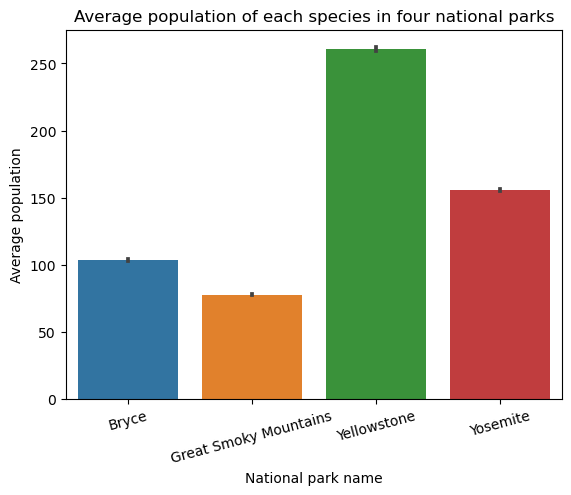

<Figure size 640x480 with 0 Axes>

In [16]:
# Size of each park: Average number of observations by park
    # I chose to leave default paramater sns.barplot(estimator='mean') as opposed to 'sum' because:
        # The numbers are easier to read (150 vs 1e6)
        # There are the same number of observations for each park (
        # each species is listed 4 times, once for each park), so 'sum' is directly proportional to 'mean'

plt.figure()
sns.barplot(data=observations_species_info, x='park_name', y='observations')
plt.title('Average population of each species in four national parks')
plt.xlabel('National park name')
plt.ylabel('Average population')
plt.xticks(rotation=15)
plt.show()
plt.clf()

# After seeing this visualization, I decided to remove ' National Park' from the park name so it is more readable.

#### Total population of each category by park

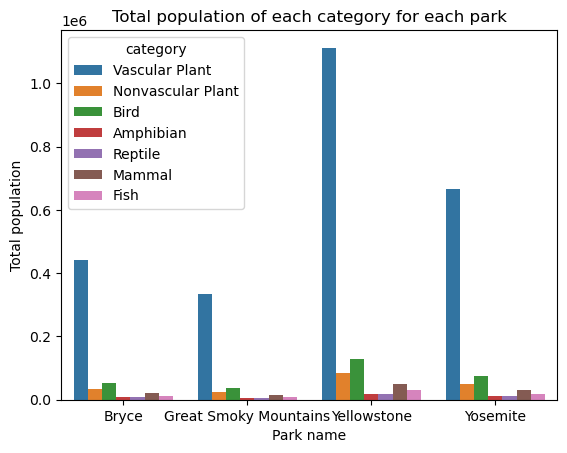

category               Amphibian      Bird      Fish    Mammal  \
park_name                                                        
Bryce                   1.281194  8.966104  2.156677  3.567553   
Great Smoky Mountains   1.321615  8.736974  2.131907  3.476449   
Yellowstone             1.346669  8.815070  2.117955  3.518727   
Yosemite                1.325562  8.827079  2.156181  3.514175   

category               Nonvascular Plant   Reptile  Vascular Plant  
park_name                                                           
Bryce                           5.727529  1.380148       76.920793  
Great Smoky Mountains           5.756334  1.317910       77.258812  
Yellowstone                     5.751121  1.354566       77.095892  
Yosemite                        5.766380  1.330079       77.080544  


<Axes: xlabel='park_name'>

<Figure size 640x480 with 0 Axes>

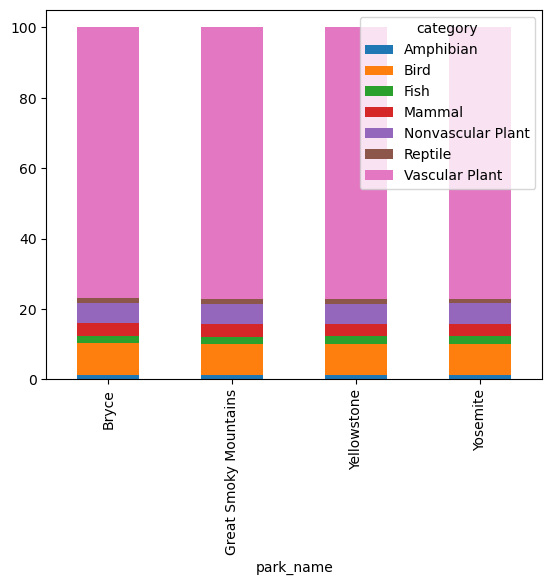

In [48]:
# Park vs category
sns.barplot(data=observations_species_info, x='park_name', y='observations', estimator="sum", hue='category', errorbar=None)
plt.title('Total population of each category for each park')
plt.xlabel('Park name')
plt.ylabel('Total population')
plt.show()
plt.clf()
# Vascular plants clearly dominate the scene

# Getting proportions
grouped_category = observations_species_info.groupby(['park_name', 'category']).observations.sum().reset_index()
grouped_category['category_percent'] = 100 * (grouped_category['observations'] / grouped_category.groupby('park_name')['observations'].transform('sum'))
# print(grouped_category)

# Preparing for stacked bar plot, just for practice
grouped_category_pivot = grouped_category.pivot(columns='category', index='park_name', values='category_percent')
print(grouped_category_pivot)
# Looks like a verrrry small difference in the composition of these parks
grouped_category_pivot.plot(kind='bar', stacked=True)

#### Endangered species in each park

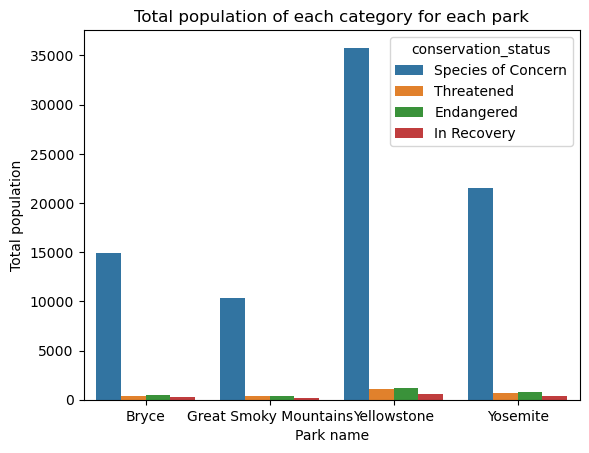

conservation_status    Endangered  In Recovery  Species of Concern  Threatened
park_name                                                                     
Bryce                    3.037456     1.602584           92.707622    2.652339
Great Smoky Mountains    2.988280     1.690973           92.278787    3.041961
Yellowstone              3.176163     1.445827           92.566536    2.811474
Yosemite                 3.198322     1.652680           92.271793    2.877205


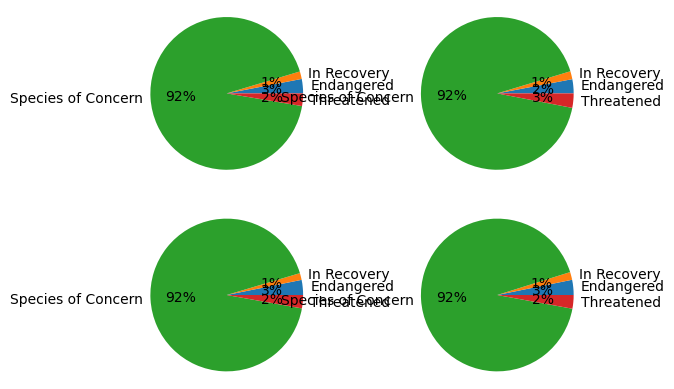

<Figure size 640x480 with 0 Axes>

In [60]:
# Park vs category
sns.barplot(data=observations_species_info, x='park_name', y='observations', estimator="sum", hue='conservation_status', errorbar=None)
plt.title('Total population of each category for each park')
plt.xlabel('Park name')
plt.ylabel('Total population')
plt.show()
plt.clf()
# Seem to be very many 'Species of Concern'

# Getting proportions
grouped_status = observations_species_info.groupby(['park_name', 'conservation_status']).observations.sum().reset_index()
grouped_status['status_percent'] = 100 * (grouped_status['observations'] / grouped_status.groupby('park_name')['observations'].transform('sum'))
# print(grouped_status)

# Poportions pivot
grouped_status_pivot = grouped_status.pivot(columns='conservation_status', index='park_name', values='status_percent')
print(grouped_status_pivot)
# Looks like a small difference in the composition of these parks

# Preparing for pie charts, just for practice (I know this is not the best data for a pie chart, this is just practice)
national_parks = grouped_status['park_name'].unique()
label_names = grouped_status['conservation_status'].unique()
for i in range(len(national_parks)):
    plt.subplot(2, 2, i+1)
    park_df = grouped_status[grouped_status['park_name'] == national_parks[i]]
    wedge_sizes = park_df['status_percent']
    plt.pie(wedge_sizes, labels=label_names, autopct='%d%%')
    plt.axis('equal')
plt.show()
plt.clf()